In [1]:
import mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import math



In [10]:

# Set random seed
np.random.seed(2)

random_start = np.random.rand(100)
starting_state = np.where(random_start>0.5, 1, 0)

def get_data(algorithm, run_times,length=30,t_pct=0.1,**args):
    state = []
    fit = []
    dur = []
    for n in range(run_times):
        start_time = datetime.now()
        fitness = mlrose.FourPeaks(t_pct=t_pct)
        problem_fit = mlrose.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True, max_val = 2)
        _state, _fit = algorithm(problem_fit, **args)
        time_diff = datetime.now() - start_time
        _dur = time_diff.microseconds/1000

        state.append(_state)
        fit.append(_fit)
        dur.append(_dur)
    return np.mean(fit),np.mean(dur)

def by_max_iters(algorithm, run_times, max_iters, **args):
    fit = []
    dur = []
    for i in max_iters:
        _fit, _dur = get_data(algorithm, run_times, max_iters=i, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

max_iters=range(1, 5000, 500)
run_times=3


In [ ]:
# Optimization

# Set random seed
np.random.seed(2)

params = [0.1,0.3,0.5,0.9]
def optimize(algorithm, run_times, **args):
    fit = []
    dur = []  
    for i in params:
        _fit, _dur = get_data(algorithm, run_times, t_pct=i, pop_size=300, max_attempts = 10, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

fit_ga, dur_ga = optimize(mlrose.mimic, 3)
plt.xlabel('t_pct')
plt.ylabel('Best Fitness')
plt.plot(params, fit_ga)
plt.title('Iteration Vs. Best Fitness')

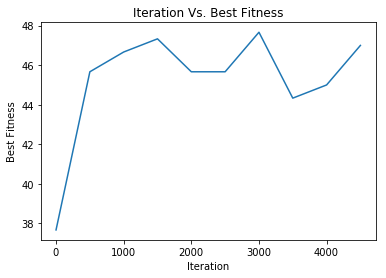

In [11]:
fit_ga, dur_ga = by_max_iters(mlrose.genetic_alg, run_times, max_iters)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(max_iters, fit_ga)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

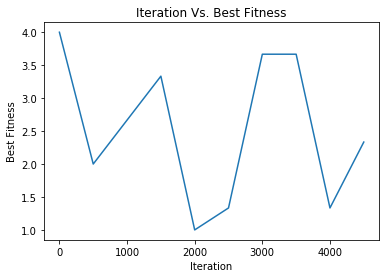

In [12]:
fit_rhc, dur_rhc = by_max_iters(mlrose.random_hill_climb, run_times, max_iters)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(max_iters, fit_rhc)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

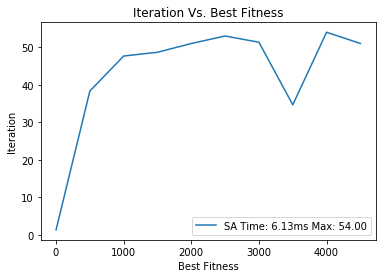

In [13]:
fit_sa, dur_sa = by_max_iters(mlrose.simulated_annealing, run_times, max_iters, schedule=mlrose.ExpDecay())
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_iters, fit_sa, label='SA Time: %0.2fms Max: %0.2f'%(np.mean(dur_sa),np.max(fit_sa)))
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()

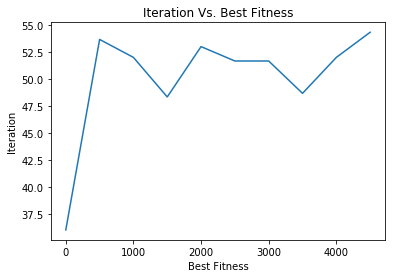

In [14]:
fit_mi, dur_mi = by_max_iters(mlrose.mimic, run_times, max_iters, pop_size=300, keep_pct=0.2, max_attempts = 10)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_iters, fit_mi)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

In [15]:
fitness_df = pd.DataFrame(np.column_stack([fit_ga,fit_rhc,fit_sa,fit_mi]),columns=['ga','rhc','sa','mimic'],index=max_iters)
duration_df = pd.DataFrame(np.column_stack([dur_ga,dur_rhc,dur_sa,dur_mi]),columns=['ga','rhc','sa','mimic'],index=max_iters)
print(fitness_df)



             ga       rhc         sa      mimic
1     37.666667  4.000000   1.333333  36.000000
501   45.666667  2.000000  38.333333  53.666667
1001  46.666667  2.666667  47.666667  52.000000
1501  47.333333  3.333333  48.666667  48.333333
2001  45.666667  1.000000  51.000000  53.000000
2501  45.666667  1.333333  53.000000  51.666667
3001  47.666667  3.666667  51.333333  51.666667
3501  44.333333  3.666667  34.666667  48.666667
4001  45.000000  1.333333  54.000000  52.000000
4501  47.000000  2.333333  51.000000  54.333333


Text(0, 0.5, 'Best Fitness')

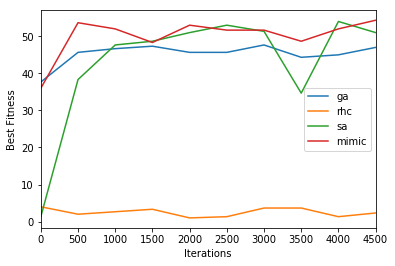

In [16]:
fig, ax = plt.subplots()
fitness_df.plot(ax=ax)
plt.xlabel("Iterations")
plt.ylabel("Best Fitness")

Text(0, 0.5, 'Time(ms)')

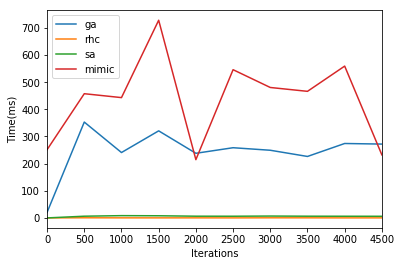

In [17]:
plt.close()
fig, ax = plt.subplots()
duration_df.plot(ax=ax)
plt.xlabel("Iterations")
plt.ylabel("Time(ms)")